In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Считывание файла и вывод общей информации о нем

In [187]:
ds = pd.read_csv("/Users/arinafedotova/regions_data.csv")

In [188]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 5 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Федеральный округ                                                     86 non-null     object 
 1   Субъект РФ                                                            86 non-null     object 
 2   ВАЛОВОЙ СБОР ПЛОДОВ И ЯГОД (в хозяйствах всех категорий; тысяч тонн)  86 non-null     float64
 3   ВАЛОВОЙ СБОР ОВОЩЕЙ (в хозяйствах всех категорий; тысяч тонн)         86 non-null     float64
 4   ВАЛОВОЙ СБОР КАРТОФЕЛЯ(в хозяйствах всех категорий; тысяч тонн)       86 non-null     float64
dtypes: float64(3), object(2)
memory usage: 3.5+ KB


In [189]:
ds.head(10)

,Федеральный округ,Субъект РФ,ВАЛОВОЙ СБОР ПЛОДОВ И ЯГОД (в хозяйствах всех категорий; тысяч тонн),ВАЛОВОЙ СБОР ОВОЩЕЙ (в хозяйствах всех категорий; тысяч тонн),ВАЛОВОЙ СБОР КАРТОФЕЛЯ(в хозяйствах всех категорий; тысяч тонн)
0,Центральный федеральный округ,Белгородская область,82.5,260.2,336.0
1,Центральный федеральный округ,Брянская область,24.7,113.0,1256.9
2,Центральный федеральный округ,Владимирская область,22.3,78.5,169.7
3,Центральный федеральный округ,Воронежская область,129.8,346.8,485.8
4,Центральный федеральный округ,Ивановская область,7.9,34.9,65.5
5,Центральный федеральный округ,Калужская область,27.0,123.4,149.2
6,Центральный федеральный округ,Костромская область,7.1,32.9,79.3
7,Центральный федеральный округ,Курская область,42.4,101.4,343.4
8,Центральный федеральный округ,Липецкая область,89.6,300.8,383.9
9,Центральный федеральный округ,Московская область,140.3,551.4,521.9


Создание словаря: {федеральный округ : {субъект рф : {название валового сбора : значение}}} <br>
Циклом for проходили по множеству Федеральных округов и заносили их в ключи словаря,  вложенным циклом for по строкам с одинаковыми федеральными округами и записывали субъект как ключ к вложенному а в значение словарь (ключ в виде названия столбца, значение - его показатель)

In [190]:
data_dict = dict()
for district in set(ds.get('Федеральный округ')):
    data_dict[district] = dict()
    for subject_values in ds.values[ds['Федеральный округ'] == district]:
        data_dict[district][subject_values[1]] = {
            'ВАЛОВОЙ СБОР ПЛОДОВ И ЯГОД (в хозяйствах всех категорий; тысяч тонн)' : float(subject_values[2]),
            'ВАЛОВОЙ СБОР ОВОЩЕЙ (в хозяйствах всех категорий; тысяч тонн)' : float(subject_values[3]),
            'ВАЛОВОЙ СБОР КАРТОФЕЛЯ (в хозяйствах всех категорий; тысяч тонн)' : float(subject_values[4])
        }

count = 1
for key, value in data_dict.items():
    print("{0}. {1}: ".format(count, key,value))
    for key2, value2 in value.items():
        print("\t{0}: ".format(key2, value2))
        for key3, value3 in value2.items():
            print("\t\t {0}: {1}".format(key3, value3))
    count += 1
    

1. Приволжский федеральный округ: 
	Республика Башкортостан: 
		 ВАЛОВОЙ СБОР ПЛОДОВ И ЯГОД (в хозяйствах всех категорий; тысяч тонн): 47.0
		 ВАЛОВОЙ СБОР ОВОЩЕЙ (в хозяйствах всех категорий; тысяч тонн): 279.5
		 ВАЛОВОЙ СБОР КАРТОФЕЛЯ (в хозяйствах всех категорий; тысяч тонн): 563.6
	Республика Марий Эл: 
		 ВАЛОВОЙ СБОР ПЛОДОВ И ЯГОД (в хозяйствах всех категорий; тысяч тонн): 29.6
		 ВАЛОВОЙ СБОР ОВОЩЕЙ (в хозяйствах всех категорий; тысяч тонн): 126.2
		 ВАЛОВОЙ СБОР КАРТОФЕЛЯ (в хозяйствах всех категорий; тысяч тонн): 236.1
	Республика Мордовия: 
		 ВАЛОВОЙ СБОР ПЛОДОВ И ЯГОД (в хозяйствах всех категорий; тысяч тонн): 26.7
		 ВАЛОВОЙ СБОР ОВОЩЕЙ (в хозяйствах всех категорий; тысяч тонн): 97.2
		 ВАЛОВОЙ СБОР КАРТОФЕЛЯ (в хозяйствах всех категорий; тысяч тонн): 251.7
	Республика Татарстан: 
		 ВАЛОВОЙ СБОР ПЛОДОВ И ЯГОД (в хозяйствах всех категорий; тысяч тонн): 105.7
		 ВАЛОВОЙ СБОР ОВОЩЕЙ (в хозяйствах всех категорий; тысяч тонн): 279.6
		 ВАЛОВОЙ СБОР КАРТОФЕЛЯ (в хозяйствах все

Получение данных об одном федеральном округе с помощью вложенных циклов for и format сделали удобный вывод

In [191]:
def get_one_federal_district(federal_district):
    current_district_data = data_dict[federal_district]
    print(f"{federal_district}: ")
    for key2, value2 in current_district_data.items():
        print("\t{0}: ".format(key2, value2)) 
        for key3, value3 in value2.items():
            print("\t\t {0}: {1}".format(key3, value3)) 
    return data_dict[federal_district]

In [192]:
print_one_federal_district('Дальневосточный федеральный округ')

Дальневосточный федеральный округ: 
	Республика Бурятия: 
		 ВАЛОВОЙ СБОР ПЛОДОВ И ЯГОД (в хозяйствах всех категорий; тысяч тонн): 2.7
		 ВАЛОВОЙ СБОР ОВОЩЕЙ (в хозяйствах всех категорий; тысяч тонн): 37.6
		 ВАЛОВОЙ СБОР КАРТОФЕЛЯ (в хозяйствах всех категорий; тысяч тонн): 102.6
	Республика Саха (Якутия): 
		 ВАЛОВОЙ СБОР ПЛОДОВ И ЯГОД (в хозяйствах всех категорий; тысяч тонн): 0.9
		 ВАЛОВОЙ СБОР ОВОЩЕЙ (в хозяйствах всех категорий; тысяч тонн): 26.4
		 ВАЛОВОЙ СБОР КАРТОФЕЛЯ (в хозяйствах всех категорий; тысяч тонн): 73.5
	Забайкальский край: 
		 ВАЛОВОЙ СБОР ПЛОДОВ И ЯГОД (в хозяйствах всех категорий; тысяч тонн): 1.5
		 ВАЛОВОЙ СБОР ОВОЩЕЙ (в хозяйствах всех категорий; тысяч тонн): 17.7
		 ВАЛОВОЙ СБОР КАРТОФЕЛЯ (в хозяйствах всех категорий; тысяч тонн): 92.7
	Камчатский край: 
		 ВАЛОВОЙ СБОР ПЛОДОВ И ЯГОД (в хозяйствах всех категорий; тысяч тонн): 1.7
		 ВАЛОВОЙ СБОР ОВОЩЕЙ (в хозяйствах всех категорий; тысяч тонн): 13.1
		 ВАЛОВОЙ СБОР КАРТОФЕЛЯ (в хозяйствах всех категорий; ты

Функция pr для подсчета процентов к итогу относительно к одной переменной: cчитает сумму, а затем процент от нее каждого числа, поступившего на вход списка

In [193]:
def pr(data):
    total = sum(data)
    percentages = [(data[i] / total) * 100 for i in range(len(data))]
    
    return percentages

Формируем списки из колонок, применяем к каждой из них функцию pr и считаем разницу каждого значения от 100

In [194]:
list_fruit_berry = list(ds.get('ВАЛОВОЙ СБОР ПЛОДОВ И ЯГОД (в хозяйствах всех категорий; тысяч тонн)'))
list_vegetables = list(ds.get('ВАЛОВОЙ СБОР ОВОЩЕЙ (в хозяйствах всех категорий; тысяч тонн)'))
list_potatoes = list(ds.get('ВАЛОВОЙ СБОР КАРТОФЕЛЯ(в хозяйствах всех категорий; тысяч тонн)'))

# Создаем объекты списков для хранения значений в процентах к итогу
percentages_fruit_berry = pr(list_fruit_berry)
percentages_vegetables = pr(list_vegetables)
percentages_potatoes = pr(list_potatoes) 

total_values = [100] * len(percentages_fruit_berry)

# Подсчитываем разницу между списком значений в 100% и списками процентов к итогу
difference_fruit_berry = [total - percentage for total, percentage in zip(total_values, percentages_fruit_berry)]
difference_vegetables = [total - percentage for total, percentage in zip(total_values, percentages_vegetables)]
difference_potatoes = [total - percentage for total, percentage in zip(total_values, percentages_potatoes)]

# Вывод результатов
print("Разница для ВАЛОВОЙ СБОР ПЛОДОВ И ЯГОД:", difference_fruit_berry)
print("Разница для ВАЛОВОЙ СБОР ОВОЩЕЙ:", difference_vegetables)
print("Разница для ВАЛОВОЙ СБОР КАРТОФЕЛЯ:", difference_potatoes)

Разница для ВАЛОВОЙ СБОР ПЛОДОВ И ЯГОД: [98.08446910771089, 99.42650166012677, 99.48222619517519, 96.98623139613179, 99.81657340546565, 99.37309898070538, 99.83514825048178, 99.01553321414474, 97.91961735819267, 96.74243655529499, 99.42185794887274, 99.43114537138081, 99.55884743086675, 99.08751073858228, 99.41489238199169, 98.75548538391882, 99.45668578327799, 99.90944763054634, 99.89551649678423, 99.88390721864914, 99.83979196173581, 100.0, 99.83979196173581, 99.74923959228215, 98.90872785530196, 98.54651837748729, 99.96981587684878, 99.67261835659059, 99.71673361350392, 98.49079384243888, 99.99303443311895, 95.65580812185098, 86.024750980984, 99.61457196591516, 96.1735819266758, 97.50632705658361, 99.83514825048178, 95.13106875014512, 98.60920847941675, 84.20905988065661, 99.43811093826186, 98.64171445819498, 99.27093733311662, 97.32754417330331, 98.90872785530196, 99.31273073440293, 99.38006454758643, 97.54579860224291, 99.62153753279621, 98.93891197845318, 99.21056908681417, 99.27

Реализация функций

In [195]:
# Функция для вычисления среднего арифметического
def mn(data):
    if not data: # пришел пустой список
        return 0
    return sum(data) / len(data) # сумму разделить на длину списка

# Функция для вычисления медианы
def med(data):
    sorted_data = sorted(data) # сортируем список по возрастанию
    n = len(sorted_data) # вычисляем его длину
    if n % 2 == 0: # если четное
        return (sorted_data[n//2 - 1] + sorted_data[n//2]) / 2 # медиана из двух чисел, поэтому берем их среднее
    else: # если нечетное
        return sorted_data[n//2]

# Функция для вычисления моды
def md(data):
    freq = {} 
    for item in data:
        freq[item] = freq.get(item, 0) + 1 # заполнение словаря: ключ - значение списка, значение количество его повторений
    max_freq = max(freq.values()) # получаем самое большое количество повторений
    modes = [item for item, freq in freq.items() if freq == max_freq] # ищем значения с максимлальным количеством повторений
    if len(modes) == len(data): # если все встречались одинаковое количество раз
        return "Нет уникальной моды"
    return modes 

# Функция для вычисления среднего квадратического отклонения
def sd(data):
    if not data:
        return 0
    mean_value = mn(data) # среднее
    variance = sum((x - mean_value) ** 2 for x in data) / len(data) # сумму квадратов разницы между элементом списка и средним его значением 
                                                                    # делим на длину списка
    return variance ** 0.5 # возвращаем корень из полученного числа

# Функция для вычисления размаха
def r(data):
    if not data:
        return 0
    return max(data) - min(data) # разница между максимальным и минимальным

Вывод результатов по наборам  <br>
1. словарь параметров колонок
2. вывод форматированный

In [196]:
result_lists = dict()
for column, values in data.items():
    result_lists[column] = {
        'Среднее арифметическое': mn(values),
        'Медиана': med(values),
        'Мода': md(values),
        'Среднее квадратическое отклонение': sd(values),
        'Размах': r(values)
    }

# Вывод результатов
for column, results in result_lists.items():
    print(f"Для '{column}':")
    for func_name, result in results.items():
        print(f"{func_name}: {result}")
    print()

Для 'ВАЛОВОЙ СБОР ПЛОДОВ И ЯГОД':
Среднее арифметическое: 50.35058823529411
Медиана: 24.4
Мода: [0.0, 0.3]
Среднее квадратическое отклонение: 101.35134419553702
Размах: 680.1

Для 'ВАЛОВОЙ СБОР ОВОЩЕЙ':
Среднее арифметическое: 160.4611764705882
Медиана: 88.2
Мода: [0.1, 37.6]
Среднее квадратическое отклонение: 257.97657946324716
Размах: 1628.9

Для 'ВАЛОВОЙ СБОР КАРТОФЕЛЯ':
Среднее арифметическое: 222.64352941176466
Медиана: 169.7
Мода: [0.7, 194.2]
Среднее квадратическое отклонение: 215.40148639339614
Размах: 1256.8000000000002



Вывод результатов по введенным пользовательским параметрам

In [197]:
variables = { # данные для выбора
    'ВАЛОВОЙ СБОР ПЛОДОВ И ЯГОД': list_fruit_berry,
    'ВАЛОВОЙ СБОР ОВОЩЕЙ': list_vegetables,
    'ВАЛОВОЙ СБОР КАРТОФЕЛЯ': list_potatoes
}

# Запрос у пользователя названия функции
func_name = input("Введите название функции (mn, med, md, sd, r): ")

# Запрос у пользователя названия переменной
variable_name = input("Выберите из списка данные для расчета метрик: 'ВАЛОВОЙ СБОР ПЛОДОВ И ЯГОД, ВАЛОВОЙ СБОР ОВОЩЕЙ, ВАЛОВОЙ СБОР КАРТОФЕЛЯ")

# Вычисление характеристики для выбранной функции и переменной
result = eval(func_name)(variables[variable_name])

# Вывод результата
print(f"Значение {func_name} для переменной {variable_name}: {result}")

Введите название функции (mn, med, md, sd, r):  r
Выберите из списка данные для расчета метрик: 'ВАЛОВОЙ СБОР ПЛОДОВ И ЯГОД, ВАЛОВОЙ СБОР ОВОЩЕЙ, ВАЛОВОЙ СБОР КАРТОФЕЛЯ ВАЛОВОЙ СБОР КАРТОФЕЛЯ


Значение r для переменной ВАЛОВОЙ СБОР КАРТОФЕЛЯ: 1256.8000000000002


На основании дата фрейма, который объединил все исходные переменные, вычисляются коэффициенты корреляции и по ним строятся матрица и график 

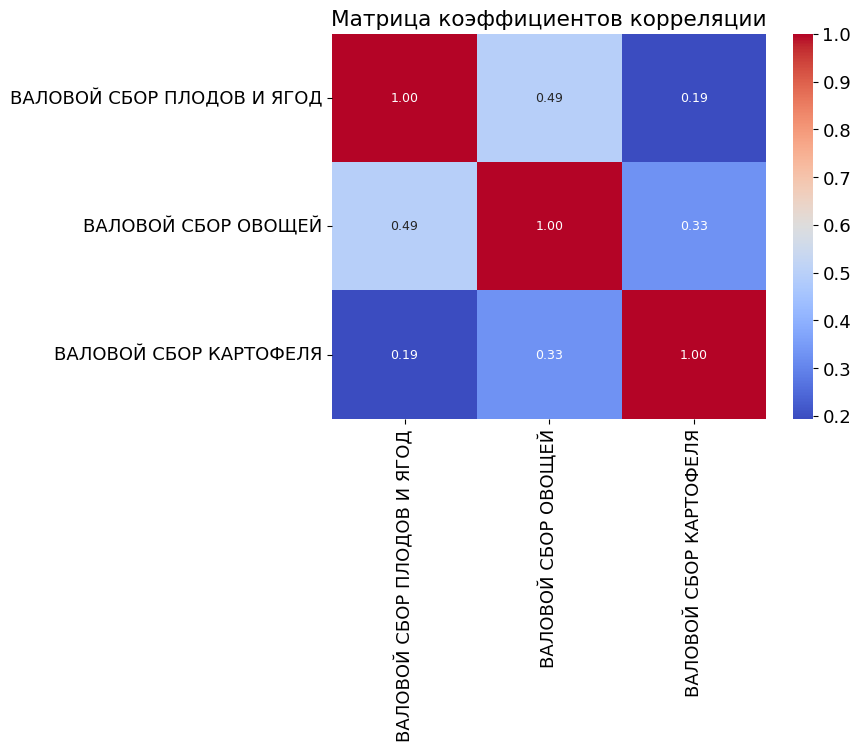

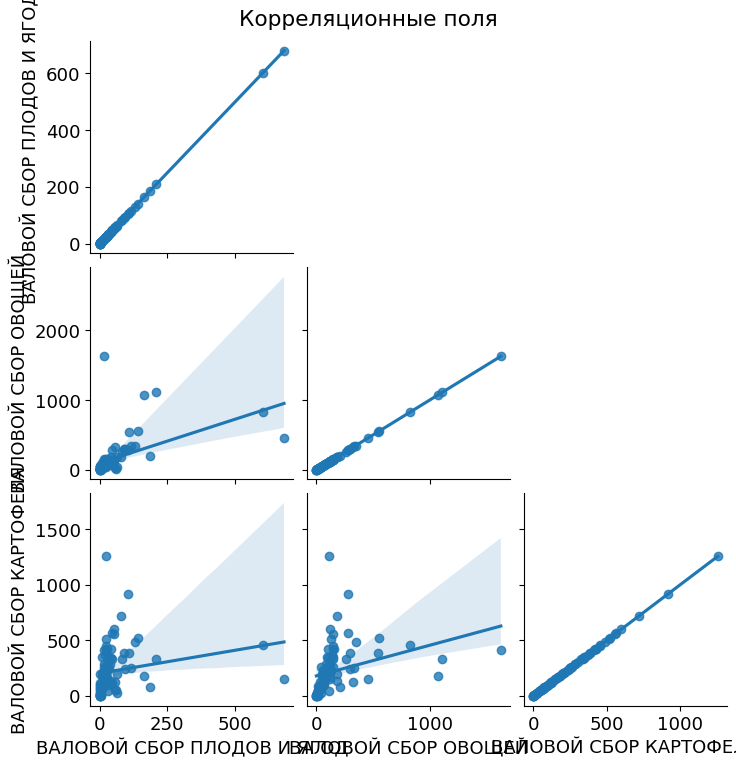

In [198]:
# Создание DataFrame из исходных данных
df = pd.DataFrame(variables)

# Получение матрицы коэффициентов корреляции
correlation_matrix = df.corr()

# Построение тепловой карты
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 9})
plt.title('Матрица коэффициентов корреляции')
plt.show()

# Построение графика корреляционных полей
sns.pairplot(df, kind='reg', diag_kind = None, corner=True)
plt.suptitle('Корреляционные поля', y=1.02)
plt.show()

1. Чем ближе показатель корреляции к единице по модуля, тем теснее связь. Связь наиболее тесна между показателями валового сбора овощей и ягодами, и равна 0,49. Со значением 0,33 зависят показатели валового сбора картофеля и овощей, в то время как самые независящие друг от друга показатели - это картофель и ягоды с коэффициентом корреляции, равном 0,2

2. Взаимосвязь между параметрами прямая. Эти графики помогают соединять различные параметры. Чем больше уровень достоверности, тем более широким будет доверительный интервал вокруг линии. Следовательно, достоверность данных отображенных на графиках очень высока, так как доверительный интервал занимает значительную часть графика. Прогностическая способность в дальнейшем (используя большее количество данных) будет неточной, не будет давать данных, приближенных к реальной ситуации.

Строится на таком же дата фрейме гистограмма которая отражает частоту всех значений всех трех валовых сборов

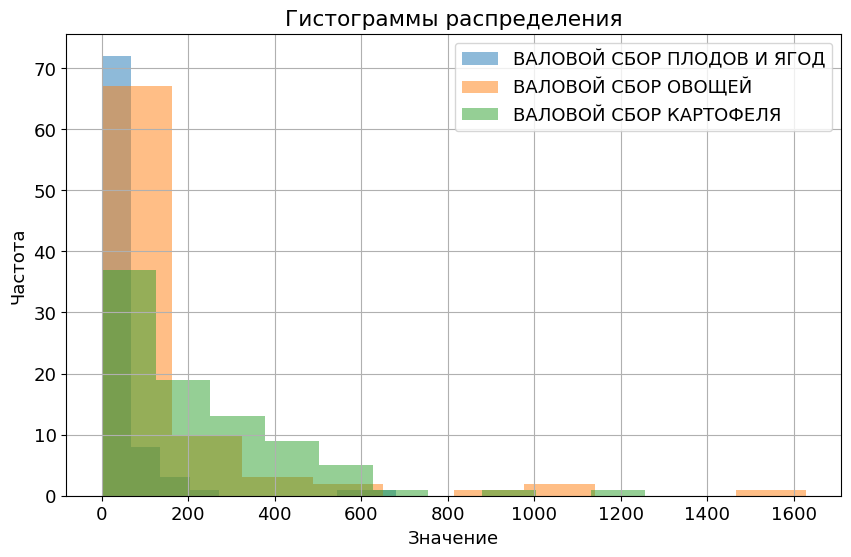

In [199]:
df = pd.DataFrame(variables)
plt.figure(figsize=(10, 6))

# Построение гистограмм для каждой переменной
for column, values in variables.items():
    plt.hist(values, bins=10, alpha=0.5, label=column)

# Задание подписей, легенды и разметки
plt.title('Гистограммы распределения')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.legend()
plt.grid(True)
plt.show()

График отображает, насколько часто встречается каждый показатель. Наиболее часто встречается показатель валового сбора ягод с минимальными показателями. Значения показателей резко уменьшаются по частоте. Частота показателя валового сбора картофеля снимается наиболее постепенно: от минимальных значений к максимальным. У показателя "Валовый сбор овощей" среди всех показателей единственные прослеживаются на протяжении всего графика распределения

Для каждой переменной сторится график по ее значениям, а ее название заносится в легенду 

In [201]:
ds[20:40]

,Федеральный округ,Субъект РФ,ВАЛОВОЙ СБОР ПЛОДОВ И ЯГОД (в хозяйствах всех категорий; тысяч тонн),ВАЛОВОЙ СБОР ОВОЩЕЙ (в хозяйствах всех категорий; тысяч тонн),ВАЛОВОЙ СБОР КАРТОФЕЛЯ(в хозяйствах всех категорий; тысяч тонн)
20,Северо-Западный федеральный округ,Архангельская область,6.9,25.3,81.5
21,Северо-Западный федеральный округ,Ненецкий автономный округ,0.0,0.1,0.7
22,Северо-Западный федеральный округ,Архангельская область без автономного округа,6.9,25.2,80.9
23,Северо-Западный федеральный округ,Вологодская область,10.8,52.1,183.9
24,Северо-Западный федеральный округ,Калининградская область,47.0,68.0,118.8
25,Северо-Западный федеральный округ,Ленинградская область,62.6,180.7,194.2
26,Северо-Западный федеральный округ,Мурманская область,1.3,0.6,6.7
27,Северо-Западный федеральный округ,Новгородская область,14.1,118.9,218.4
28,Северо-Западный федеральный округ,Псковская область,12.2,31.5,121.5
29,Южный федеральный округ,Республика Адыгея,65.0,36.7,22.8


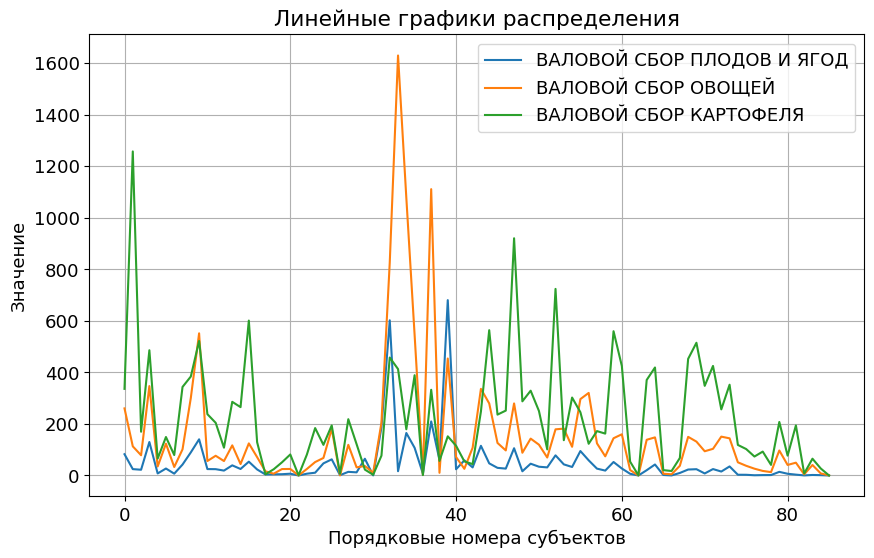

In [202]:
# Создание графика
plt.figure(figsize=(10, 6))

# Построение линейных графиков для каждой переменной
for column, values in variables.items():
    plt.plot(values, label=column)

plt.title('Линейные графики распределения')
plt.xlabel('Порядковые номера субъектов')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()

На график выведена информация разброса значений каждого из показателей по субъектам РФ. Можно заметить, что некоторые субъекты сильно выделяются по показателям сборов картофеля и овощей. <br>
Самые яркие всплески: <br>
1 - Центральный федеральный округ Брянская область 1256.9 за сбор картофеля <br>
33 - Южный федеральный округ Астраханская область 1629.0 за сбор овощей и вообще субъекты под номерами от 32 до 33 самые пиковые <br>

Круговая диаграмма:
1. Формируются словари каждых метрик: ключ-Субъект РФ : значение-проценты к итогу метрики
2. Сортируются по своим значениям
3. Формируется словарь со значениями, которые меньше определенного числа
4. Его значения суммируются
5. И удаляются из изначальных словарей
6. На их место ставится элемент с ключем 'Другие' и значением равной сумме этих элементов меньших заданного числа, чтобы увидеть у каких субъектов самые значимые показатели валового сбора

dict_values([0.0, 0.0, 0.006965566881051338, 0.006965566881051338, 0.006965566881051338, 0.020896700643154013, 0.030184123151222465, 0.030184123151222465, 0.03482783440525669, 0.03947154565929092, 0.04643711254034225, 0.04643711254034225, 0.06269010192946205, 0.06733381318349627, 0.07662123569156472, 0.09055236945366739, 0.10448350321577007, 0.11609278135085563, 0.15324247138312944, 0.15556432701014655, 0.16020803826418079, 0.16020803826418079, 0.164851749518215, 0.164851749518215, 0.18342659453435192, 0.18342659453435192, 0.22754185144767705, 0.2507604077178482, 0.2832663864960877, 0.3273816434094129, 0.3273816434094129, 0.35524391093361823, 0.3784624672037894, 0.3854280340848408, 0.4411525691332514, 0.4411525691332514, 0.4759804035385081, 0.5177738048248162, 0.5363486498409531, 0.5433142167220043, 0.5618890617381413, 0.5665327729921754, 0.5688546286191926, 0.5734983398732268, 0.5781420511272611, 0.5781420511272611, 0.5851076180083123, 0.617613596786552, 0.6199354524135692, 0.62690101

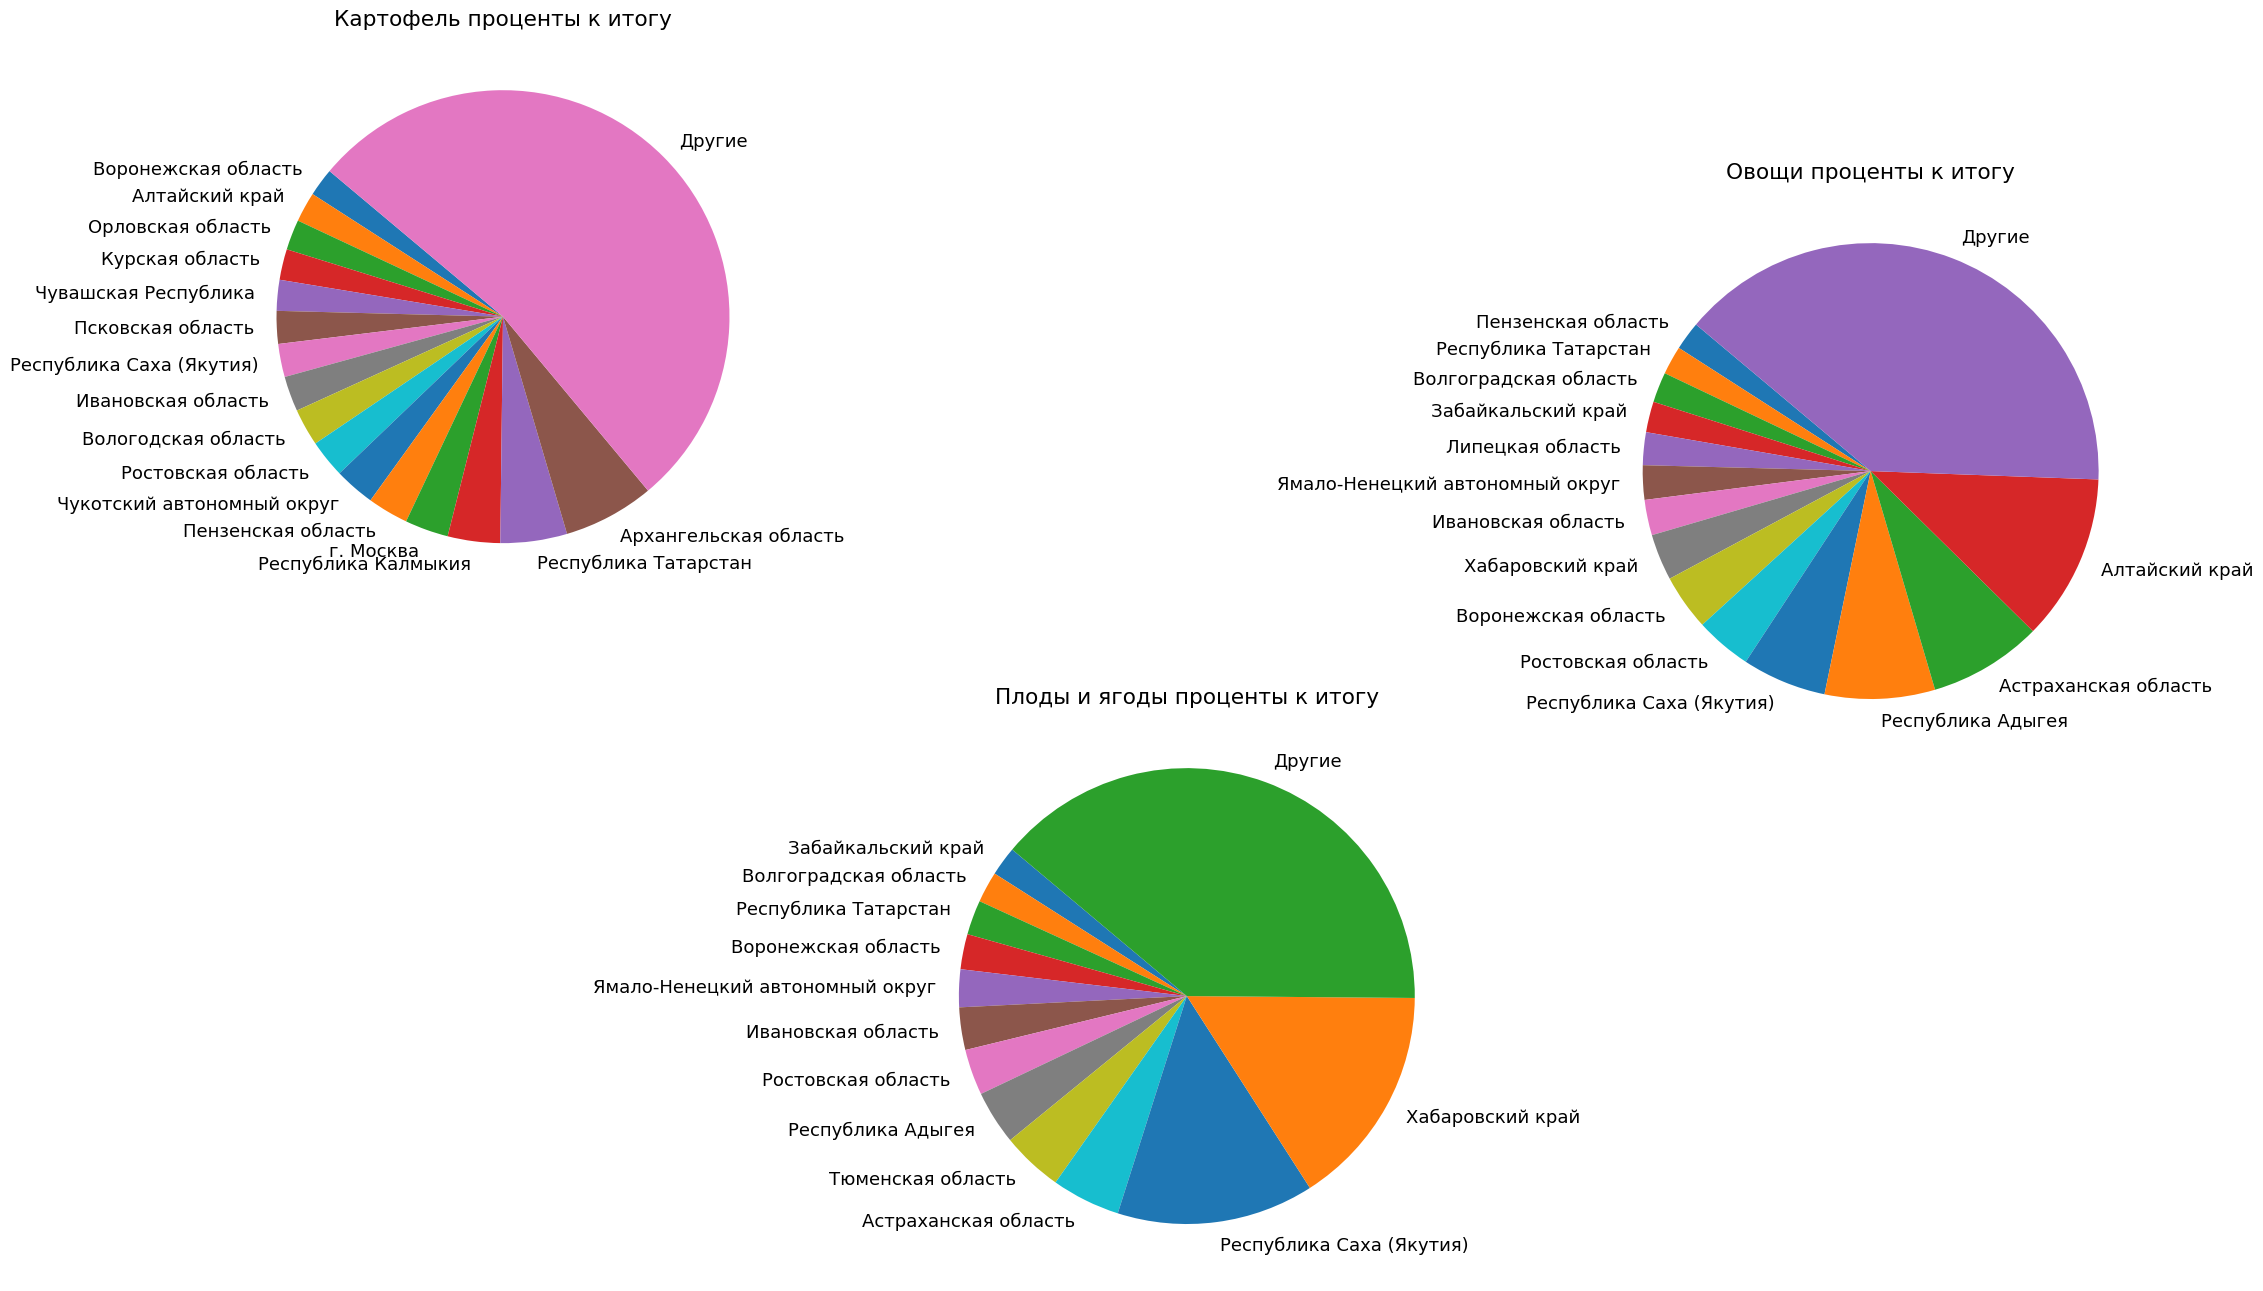

In [204]:
# Исходные данные
ds_berries = dict()
ds_veg = dict()
ds_potato = dict()
count = 0
for i in set(ds.get('Субъект РФ ')):
    ds_berries[i] = percentages_fruit_berry[count]
    ds_veg[i] = percentages_vegetables[count]
    ds_potato[i] = percentages_potatoes[count]
    count += 1
        
ds_berries = dict(sorted(ds_berries.items(), key = lambda item: item[1]))
ds_veg = dict(sorted(ds_veg.items(), key = lambda item: item[1]))
ds_potato = dict(sorted(ds_potato.items(), key = lambda item: item[1]))
print(ds_berries.values())

# Находим элементы, значения которых меньше порога
value_lim = 2
small_elements_berries = {key: value for key, value in ds_berries.items() if value < value_lim}
small_elements_veg = {key: value for key, value in ds_veg.items() if value < value_lim}
small_elements_potato = {key: value for key, value in ds_potato.items() if value < value_lim}

# Суммируем значения всех элементов, меньших порога
other_berries_sum = sum(small_elements_berries.values())
other_veg_sum = sum(small_elements_veg.values())
other_potato_sum = sum(small_elements_potato.values())

# Удаляем маленькие элементы из исходных словарей
for key in small_elements_berries:
    del ds_berries[key]

for key in small_elements_veg:
    del ds_veg[key]

for key in small_elements_potato:
    del ds_potato[key]

# Добавляем "Другие" элементы с суммированными значениями
ds_berries['Другие'] = other_berries_sum
ds_veg['Другие'] = other_veg_sum
ds_potato['Другие'] = other_potato_sum

plt.figure(figsize=(25, 25))

plt.subplot(1, 3, 2)
plt.pie(ds_berries.values(), labels = ds_berries.keys(), autopct='', startangle=140)
plt.title('Плоды и ягоды проценты к итогу')

plt.subplot(2, 3, 3)
plt.pie(ds_veg.values(), labels = ds_veg.keys(), autopct='', startangle=140)
plt.title('Овощи проценты к итогу')

plt.subplot(3, 3, 1)
plt.pie(ds_potato.values(), labels = ds_potato.keys(),  autopct='', startangle=140)
plt.title('Картофель проценты к итогу')

plt.rcParams['font.size'] = 13

plt.show()

Республика Татарстан является регионом с наиболее высоким показателем валового сбора картофеля, и, соответственно, занимает лидирующую позицию. Второе и третье места занимают Ивановская область и Забайкальский край, соответственные. Лидером по показателю валового сбора плодов и ягод является Республика Хакасия. С небольшим отрывом от нее идет Оренбургская область, а третье место занимает Орловская область. Кемеровская, Орловская и Иркутская области занимают лидирующие позиции по показателю валового сбора овощей.

Считаем с помощью написанной выше функцией среднее арифмитическое и сохранем датафрейм, который был построен из исходного .csv файла с фильтром по значению ВАЛОВОГО СБОРА ПЛОДОВ И ЯГОД (в хозяйствах всех категорий; тысяч тонн)

In [205]:
mean_first_variable = mn(list_fruit_berry)

df_first = pd.DataFrame(ds[ds['ВАЛОВОЙ СБОР ПЛОДОВ И ЯГОД (в хозяйствах всех категорий; тысяч тонн)'] > mean_first_variable])
df_first

,Федеральный округ,Субъект РФ,ВАЛОВОЙ СБОР ПЛОДОВ И ЯГОД (в хозяйствах всех категорий; тысяч тонн),ВАЛОВОЙ СБОР ОВОЩЕЙ (в хозяйствах всех категорий; тысяч тонн),ВАЛОВОЙ СБОР КАРТОФЕЛЯ(в хозяйствах всех категорий; тысяч тонн)
0,Центральный федеральный округ,Белгородская область,82.5,260.2,336.0
3,Центральный федеральный округ,Воронежская область,129.8,346.8,485.8
8,Центральный федеральный округ,Липецкая область,89.6,300.8,383.9
9,Центральный федеральный округ,Московская область,140.3,551.4,521.9
15,Центральный федеральный округ,Тульская область,53.6,124.5,600.8
25,Северо-Западный федеральный округ,Ленинградская область,62.6,180.7,194.2
29,Южный федеральный округ,Республика Адыгея,65.0,36.7,22.8
31,Южный федеральный округ,Республика Крым,187.1,204.8,76.9
32,Южный федеральный округ,Краснодарский край,601.9,825.4,457.5
34,Южный федеральный округ,Волгоградская область,164.8,1077.2,179.3


Считаем с помощью написанной выше функцией медиану и сохранем датафрейм, который был построен из исходного .csv файла с фильтром по значению ВАЛОВОГО СБОРА ОВОЩЕЙ  (в хозяйствах всех категорий; тысяч тонн)

In [206]:
mean_second_variable = med(list_vegetables)
df_second = ds.loc[ds['ВАЛОВОЙ СБОР ОВОЩЕЙ (в хозяйствах всех категорий; тысяч тонн)'] < mean_second_variable]

df_second

,Федеральный округ,Субъект РФ,ВАЛОВОЙ СБОР ПЛОДОВ И ЯГОД (в хозяйствах всех категорий; тысяч тонн),ВАЛОВОЙ СБОР ОВОЩЕЙ (в хозяйствах всех категорий; тысяч тонн),ВАЛОВОЙ СБОР КАРТОФЕЛЯ(в хозяйствах всех категорий; тысяч тонн)
2,Центральный федеральный округ,Владимирская область,22.3,78.5,169.7
4,Центральный федеральный округ,Ивановская область,7.9,34.9,65.5
6,Центральный федеральный округ,Костромская область,7.1,32.9,79.3
10,Центральный федеральный округ,Орловская область,24.9,56.1,237.8
11,Центральный федеральный округ,Рязанская область,24.5,76.5,204.3
12,Центральный федеральный округ,Смоленская область,19.0,56.0,107.8
14,Центральный федеральный округ,Тверская область,25.2,44.4,265.1
16,Центральный федеральный округ,Ярославская область,23.4,71.1,129.0
17,Центральный федеральный округ,г. Москва,3.9,16.1,4.6
18,Северо-Западный федеральный округ,Республика Карелия,4.5,7.0,24.2


Создаем из изночального датафрейма отсортированного по трем уровням и с помощью метода head вывели первые 10 записей

In [207]:
df_sorted = ds.sort_values(by=['ВАЛОВОЙ СБОР ОВОЩЕЙ (в хозяйствах всех категорий; тысяч тонн)',
                               'ВАЛОВОЙ СБОР ПЛОДОВ И ЯГОД (в хозяйствах всех категорий; тысяч тонн)',
                               'ВАЛОВОЙ СБОР КАРТОФЕЛЯ(в хозяйствах всех категорий; тысяч тонн)'])

df_sorted.head(10)

,Федеральный округ,Субъект РФ,ВАЛОВОЙ СБОР ПЛОДОВ И ЯГОД (в хозяйствах всех категорий; тысяч тонн),ВАЛОВОЙ СБОР ОВОЩЕЙ (в хозяйствах всех категорий; тысяч тонн),ВАЛОВОЙ СБОР КАРТОФЕЛЯ(в хозяйствах всех категорий; тысяч тонн)
21,Северо-Западный федеральный округ,Ненецкий автономный округ,0.0,0.1,0.7
62,Уральский федеральный округ,Ямало-Ненецкий автономный округ,0.0,0.1,0.7
85,Дальневосточный федеральный округ,Чукотский автономный округ,0.0,0.3,0.1
26,Северо-Западный федеральный округ,Мурманская область,1.3,0.6,6.7
36,Южный федеральный округ,г. Севастополь,7.1,3.0,1.5
82,Дальневосточный федеральный округ,Магаданская область,0.3,4.4,7.7
66,Сибирский федеральный округ,Республика Тыва,0.3,4.7,17.4
65,Сибирский федеральный округ,Республика Алтай,2.0,6.9,20.8
18,Северо-Западный федеральный округ,Республика Карелия,4.5,7.0,24.2
84,Дальневосточный федеральный округ,Еврейская автономная область,1.3,8.0,27.1
